In [1]:
import numpy as np
import matplotlib.pyplot as plt
from soma import aims
import nibabel as nb

In [2]:
def plot_grid(img, c='violet'):
    su, sv = img.shape
    for u in range(su):
        plt.plot([u - .5, u - .5], [-.5, sv-.5], color=c)
    for v in range(sv):
        plt.plot([-.5, su-.5], [v - .5, v - .5], color=c)
        
def plot_pixel(u, v, offset=.5, c='moccasin'):
    plt.plot([u-offset, u-offset], [v-offset, v+offset], color=c, lw=2)
    plt.plot([u-offset, u+offset], [v+offset, v+offset], color=c, lw=2)
    plt.plot([u+offset, u+offset], [v-offset, v+offset], color=c, lw=2)
    plt.plot([u-offset, u+offset], [v-offset, v-offset], color=c, lw=2)

def show_slice(vol, x):
    img = np.asarray(vol)[x, :, :][:, :, 0]
    plt.imshow(img, interpolation="nearest", aspect="auto", vmin=0, vmax=3)
    plot_grid(img)

volume dimension: [20, 20, 20, 1] [1, 1, 1]


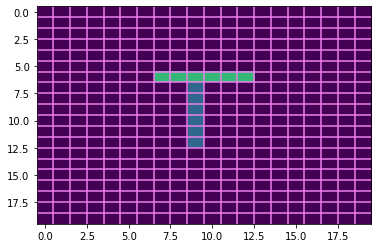

In [3]:
imgf = "/var/tmp/several_voxel_image.nii"
rs_imgf = "/var/tmp/resampled_several_voxel_image.nii"

dt = np.zeros((20, 20, 20))
dt[7:13, 7:13, 10] = 1
dt[7:13, 13, 7:13] = 2
dt[10, 10, 10] = 3
aff = np.eye(4)
aff[:, 3] = 1
img = nb.Nifti1Image(dt, affine=aff)
nb.save(img, imgf)

vol = aims.read(imgf)
print("volume dimension:", vol.header()['volume_dimension'], vol.header()['voxel_size'])
show_slice(vol, 10)

In [4]:
v, h = 3, 5
v_half_patch = (v-1) // 2
h_half_patch = (h-1) // 2
np.tile(np.arange(-v_half_patch, v_half_patch+1), (h,1))

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [5]:
ori = np.zeros((10, 10))
ori[5, 5] = 1
ori[((3, 5, 8), (5, 5, 4))]
list(map(tuple, v_coords_patch + v))
tuple([1,2,3])

NameError: name 'v_coords_patch' is not defined

<IPython.core.display.Javascript object>


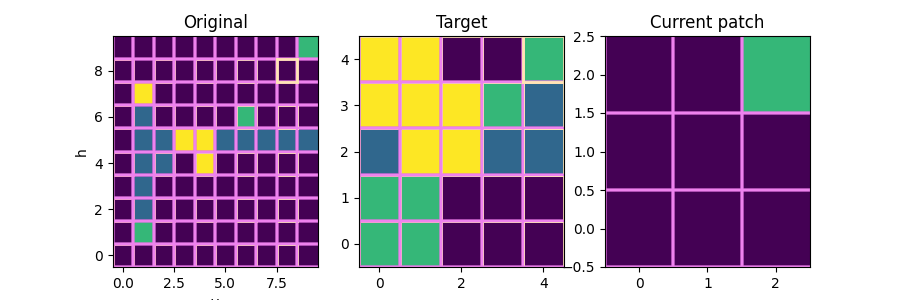

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

In [6]:
%matplotlib notebook
import time

V, H = 10, 10
ori = np.zeros((V, H))
ori[2:7, 1] = 1
ori[1, 1] = 2
ori[7, 1] = 3
ori[4:6,2] = 1
ori[5, 3] = 3
ori[5, 5:10] = 1
ori[4:6, 4] = 3
ori[6, 6] = 2
ori[V-1, H-1] = 2

r = 2.0
VP, HP = int(np.ceil(ori.shape[0] / r)), int(np.ceil(ori.shape[1] / r))
tgt = np.zeros((VP, HP))


#patch = np.ones((m, n))
s2 = np.sqrt(2)
#patch = np.array([[s2, 1, s2], [1, 0, 1], [s2, 1, s2]])
# patch = np.array([[.25, .25, .25], [.25, 1, .25], [.25, .25, .25]])
patch = np.ones((3, 3))
# patch = np.array([1])
patch_shape = patch.shape

if len(patch.shape) == 1 and patch.shape[0] == 1:
    v_coords_patch = np.array([0])
    h_coords_patch = np.array([0])

else:
    v_half_patch = (patch_shape[0]-1) // 2
    h_half_patch = (patch_shape[1]-1) // 2
    v_coords_patch = np.tile(np.arange(-v_half_patch, v_half_patch+1), (patch_shape[1],1)).T
    h_coords_patch = np.tile(np.arange(-h_half_patch, h_half_patch+1), (patch_shape[0],1))

patch = patch.flatten()
fig = plt.figure(figsize=(9, 3))
for vp in range(tgt.shape[0]):
    for hp in range(tgt.shape[1]):
        v = int(np.round(vp * r))
        h = int(np.round(hp * r))

        v_coords = (v_coords_patch + v).flatten()
        h_coords = (h_coords_patch + h).flatten()
        valid_coords = (v_coords >= 0) * (h_coords >= 0) * (v_coords < ori.shape[0]) * (h_coords < ori.shape[1])
        patched = - np.ones((patch_shape[0] * patch_shape[1],) if len(patch) > 1 else (1,))
        patched[valid_coords] = ori[h_coords[valid_coords], v_coords[valid_coords]]
#         candidates = np.unique(patched[valid_coords])
#         if len(candidates) > 1:
#             votes = np.array(list(np.sum(patch[valid_coords][patched[valid_coords]==c]) for c in candidates))
#             print(candidates, votes)
        tgt[vp, hp] = np.max(patched[valid_coords])
#             tgt[vp, hp] = candidates[np.argmax(votes)]
#         else:
#             tgt[vp, hp] = candidates[0]

        plt.subplot(131)
        plt.imshow(ori, interpolation="nearest", aspect="auto", vmin=0, vmax=3, origin='lower')
        plot_grid(ori)
        plot_pixel(v, h)
        plt.xlabel('v')
        plt.ylabel('h')
        plt.title('Original')
        plt.subplot(132)
        plt.imshow(tgt.T, interpolation="nearest", aspect="auto", vmin=0, vmax=3, origin='lower')
        plot_grid(tgt)
        plot_pixel(vp, hp)
        plt.title('Target')
        plt.subplot(133)
        img = patched.reshape(patch_shape).T if len(patch) > 1 else np.atleast_2d(patched)
        plt.imshow(img, interpolation="nearest", aspect="auto", vmin=0, vmax=3, origin='lower')
        plot_grid(img)
        plt.title('Current patch')
        fig.canvas.draw()
        time.sleep(.8)
        

<IPython.core.display.Javascript object>


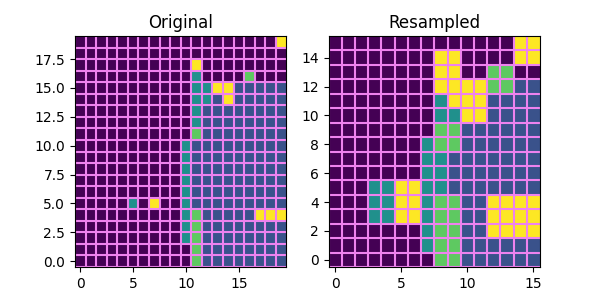

In [8]:
class Resampler:
    def __init__(self, patch=None):
        self.original = None
        self.set_patch(patch if patch is not None else [1])
        
    def set_patch(self, patch):
        self.patch = patch.flatten()
        if len(patch.shape) == 1 and patch.shape[0] == 1:
            self.v_coords_patch = np.array([0])
            self.h_coords_patch = np.array([0])
        else:
            vert_size, horiz_size = patch.shape
            v_half_patch = (vert_size - 1) // 2
            h_half_patch = (horiz_size - 1) // 2
            self.v_coords_patch = np.tile(np.arange(-v_half_patch, v_half_patch+1), (horiz_size, 1)).T
            self.h_coords_patch = np.tile(np.arange(-h_half_patch, h_half_patch+1), (vert_size,1))
        
    def fit(self, ori):
        self.original = ori

    def predict(self, vp, hp, r):
        if self.original is None:
            raise RuntimeError("The resampler must be fitted before making any prediction.")
        max_vert, max_horiz = self.original.shape
        v = int(np.round(vp * r))
        h = int(np.round(hp * r))
        v_coords = (self.v_coords_patch + v).flatten()
        h_coords = (self.h_coords_patch + h).flatten()
        valid_coords = (v_coords >= 0) * (h_coords >= 0) * (v_coords < max_vert) * (h_coords < max_horiz)
        return np.max(self.original[v_coords[valid_coords], h_coords[valid_coords]])
        
    def apply_to(self, ori, r):
        self.fit(ori)
        tgt = np.zeros((int(np.ceil(ori.shape[0] / r)), int(np.ceil(ori.shape[1] / r))))
        for vp in range(tgt.shape[0]):
            for hp in range(tgt.shape[1]):
                tgt[vp, hp] = self.predict(vp, hp, r)
        return tgt

V, H = 20, 20
ori = np.zeros((V, H))
ori[5, 5] = 2
ori[5, 7] = 4
ori[2:11, 10] = 2
ori[:16, 11:] = 1
ori[12:17, 11] = 2
ori[11, 11] = 3
ori[:5, 11] = 3
ori[17, 11] = 4
ori[14:16, 12] = 2
ori[15, 13] = 4
ori[15, 15:10] = 2
ori[14:16, 14] = 4
ori[16, 16] = 3
ori[4, H-3:] = 4
ori[V-1, H-1] = 4

r = 1.3

patch = np.ones((3, 3))
#patch = np.array([1])

rs = Resampler(patch)
resampled = rs.apply_to(ori, r)

fig = plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(ori, interpolation="nearest", aspect="auto", origin='lower')
plot_grid(ori)
plt.title('Original')
plt.subplot(122)
plt.imshow(resampled, interpolation="nearest", aspect="auto", origin='lower')
plot_grid(resampled)
plt.title('Resampled')
fig.canvas.draw()

(90, 176)


<IPython.core.display.Javascript object>


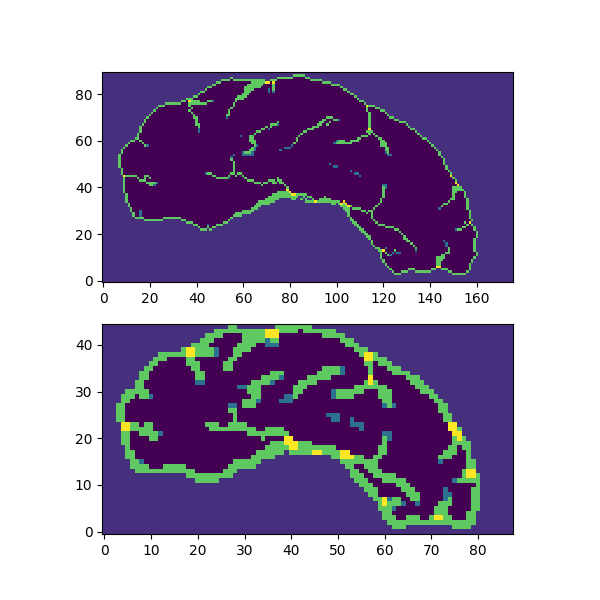

In [9]:
from soma import aims

img = aims.read("/neurospin/dico/data/bv_databases/human/pclean/all/beflo/t1mri/t1/default_analysis/segmentation/Lskeleton_beflo.nii.gz")

# s = np.array(img)[200, 100:200, 30:110]
s = np.array(img)[120:210, 80:,90][:,:,0]
print(s.shape)
patch = np.ones((3, 3))
#patch = np.array([1])

rs = Resampler(patch)
r_s = rs.apply_to(s, 2)

fig = plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.imshow(s, interpolation="nearest", origin="lower")
plt.subplot(212)
plt.imshow(r_s, interpolation="nearest", origin="lower")

In [10]:
patch = np.ones((3, 3, 3))
half_patch_s = (np.array(patch.shape) - 1) / 2
# Variation allong axis 0
x = np.reshape(np.repeat(np.arange(-half_patch_s[0], half_patch_s[0]+1), patch.shape[1] * patch.shape[2]), patch.shape)
# Variation allong axis 1
x = np.reshape(np.tile(np.repeat(np.arange(-half_patch_s[1], half_patch_s[1]+1), patch.shape[2]), patch.shape[0]), patch.shape)
# Variation along axis 2
x = np.reshape(np.tile(np.arange(-half_patch_s[2], half_patch_s[2]+1), patch.shape[0] * patch.shape[1]), patch.shape)
print(x[:, :, 0])
print(x[:, 1, 1])
print(x[1, :, 1])
print(x[1, 1, :])
print(x.shape)

[[-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]]
[0. 0. 0.]
[0. 0. 0.]
[-1.  0.  1.]
(3, 3, 3)


In [11]:
x = np.reshape(np.repeat(np.arange(-half_patch_s[0], half_patch_s[0]+1), patch.shape[1] * patch.shape[2]), patch.shape)
print(x.flatten())

x = np.repeat(np.arange(-half_patch_s[0], half_patch_s[0]+1), patch.shape[1] * patch.shape[2])
print(x)

[-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [12]:
np.repeat(np.arange(4), 3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [13]:
patch = np.ones((3, 3, 3))
x, y, z = (np.array(patch.shape) - 1) / 2
X, Y, Z = patch.shape
print(patch.shape)
patch_coords = ( 
    # Variation allong axis 0
    np.repeat(np.arange(-x, x+1), Y * Z).astype(int),
    # Variation allong axis 1
    np.tile(np.repeat(np.arange(-y, y+1), Z), X),
    # Variation along axis 2
    np.tile(np.arange(-z, z+1), X * Y)
) 
print(patch_coords[0].shape, patch_coords[1].shape, patch_coords[2].shape)
print(patch_coords[0].flatten().shape, patch_coords[1].flatten().shape, patch_coords[2].flatten().shape)
print(np.repeat(np.arange(-x, x+1), Y * Z))
print(patch_coords[0])

(3, 3, 3)
(27,) (27,) (27,)
(27,) (27,) (27,)
[-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[-1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
  1  1  1]


In [14]:
from time import time 
patch = np.ones((200, 200,100))
x, y, z = (np.array(patch.shape) - 1) / 2
X, Y, Z = patch.shape

times = [0, 0]
patch_coords= None
for n in range(100):
    tic = time()
    patch_coords = ( 
        # Variation allong axis 0
        np.repeat(np.arange(-x, x+1), Y * Z).astype(int),
        # Variation allong axis 1
        np.tile(np.repeat(np.arange(-y, y+1), Z), X).astype(int),
        # Variation along axis 2
        np.tile(np.arange(-z, z+1), X * Y).astype(int)
    ) 
    toc = time()
    patch_coords = np.array(np.meshgrid(np.arange(-x, x+1), np.arange(-y, y+1), np.arange(-z, z+1), indexing='ij'), 
                 dtype=int)
    tac = time()
    times[0] += toc - tic
    times[1] += tac - toc
print(times)
    
# i = 2
# print(x[i, :, :, 0])
# print(x[i, :, 1, 1])
# print(x[i, 1, :, 1])
# print(x[i, 1, 1, :])
# print(x.shape)

[6.077296018600464, 5.836224317550659]


In [15]:
a = np.reshape(np.arange(12), (3, 4))
print(a)
a[0, [True, False, True, True]]
a[1, [True, False, True, True]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([4, 6, 7])

<IPython.core.display.Javascript object>


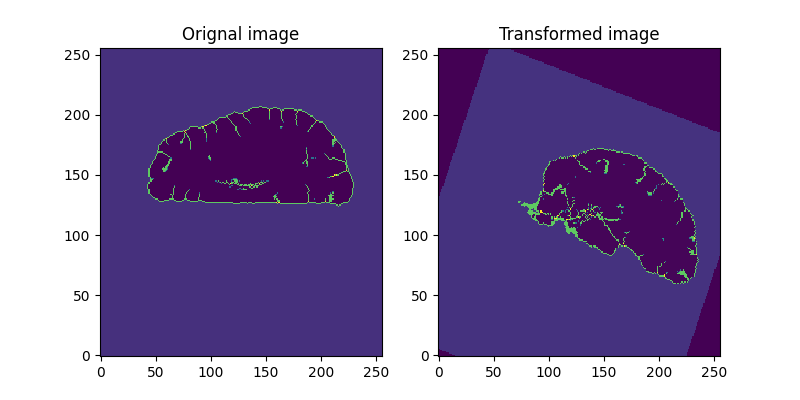

Text(0.5, 1.0, 'Transformed image')

In [16]:
def transform_3d_array(arr, trm):
    arr = np.array(arr)
    if len(arr.shape) != 3:
        raise ErrorValue("Invalid input array.")
        
    X, Y, Z = img.shape
    coords = np.array([
        # Variation allong axis 0
        np.repeat(np.arange(X), Y * Z),
        # Variation allong axis 1
        np.tile(np.repeat(np.arange(Y), Z), X),
        # Variation along axis 2
        np.tile(np.arange(Z), X * Y)
    ], dtype=int) 

    tcoords = np.dot(trm[:3, :3], coords + np.tile(trm[:3, 3], (coords.shape[1],1)).T)

    valids = np.prod(tcoords >= 0, axis=0) * np.prod(tcoords < np.tile(img.shape, (tcoords.shape[1], 1)).T, axis=0)
    tcoords = np.array(tcoords.astype(int))
    timg = -np.ones((img.shape))
    vimg = np.zeros((img.shape))
    
    valids = valids.astype(bool)
    timg[coords[0,valids], coords[1,valids], coords[2,valids]] = img[tcoords[0,valids], tcoords[1,valids], tcoords[2,valids]]
    return timg


# img = np.zeros((100,100,100))
# img[:15, 0, :] = 1
# img[15:, 0, :] = 2

img = aims.read("/neurospin/dico/data/bv_databases/human/pclean/all/beflo/t1mri/t1/default_analysis/segmentation/Lskeleton_beflo.nii.gz")
img = np.asarray(img)[:, :, :, 0]

angle = np.deg2rad(-20)

tx, ty, tz = -20, 40, 30
trm = np.array(
[
    [np.cos(angle), -np.sin(angle), 0, tx], 
    [np.sin(angle),  np.cos(angle), 0, ty], 
    [0, 0, 1, tz],
    [0, 0, 0, 1]
])

timg = transform_3d_array(img, trm)

fig = plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img[:, :, 50], interpolation="nearest", aspect='auto', origin="lower")
plt.title("Orignal image")
plt.subplot(122)
plt.imshow(timg[:, :, 50], interpolation="nearest", aspect='auto', origin="lower")
plt.title("Transformed image")
    




In [37]:
a = np.arange(3*5).reshape((3, 5))
b = np.tile(a.T, (20, 1, 1)).T

print(a.shape)
print(b.shape)
print(a)
print(b[:, :, 2])

(3, 5)
(3, 5, 20)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [253]:
a = np.array([[0, 100, 0, 0, 1, 1, 1, 1], [10, 0, 1, 1, 0, 0, 1, 1], [20, 1, 0, 1, 0, 1, 0, 1]])
b = np.swapaxes(np.tile(a, (5, 1, 1)), 0, 1)
# a = np.arange(3*20).reshape((3, 20))
# b = np.swapaxes(np.tile(a, (5, 1, 1)), 0, 1)

print(a.shape)
print(b.shape)
print(a[0])
print(b[0, 2, :])

(3, 8)
(3, 5, 8)
[  0 100   0   0   1   1   1   1]
[  0 100   0   0   1   1   1   1]


In [62]:
a = np.arange(24).reshape(3, 4, 2)
b = [5, 8, 3]
np.repeat(b, a.shape[1] * a.shape[2]).reshape((a.shape))

array([[[5, 5],
        [5, 5],
        [5, 5],
        [5, 5]],

       [[8, 8],
        [8, 8],
        [8, 8],
        [8, 8]],

       [[3, 3],
        [3, 3],
        [3, 3],
        [3, 3]]])

In [124]:
shape = (3, 3, 3)
a = np.arange(shape[0] * shape[1] * shape[2]).reshape(shape)
coords = np.array([[[0, 2], [0, 2], [0, 2]], [[0, 0], [0, 1], [0, 2]], [[0, 0], [1, 0], [2, 2]]])
print(coords[:, 0, 0])
print(coords.shape)
flt_coords = coords.reshape((3, coords.shape[1] * coords.shape[2]))
print(flt_coords)

b = a[flt_coords[0], flt_coords[1], flt_coords[2]]
b.reshape((coords.shape[1], coords.shape[2]))
#b.reshape(shape)

[0 0 0]
(3, 3, 2)
[[0 2 0 2 0 2]
 [0 0 0 1 0 2]
 [0 0 1 0 2 2]]


array([[ 0, 18],
       [ 1, 21],
       [ 2, 26]])

In [285]:
coords = np.array([[[0, 2], [0, 2], [0, 2]], [[0, 0], [0, 1], [0, 2]], [[0, 0], [1, 0], [2, 2]]])
print(coords)
print(coords.shape)
print(coords.reshape((3, 6)))
print(coords[:, 0, 2])

[[[0 2]
  [0 2]
  [0 2]]

 [[0 0]
  [0 1]
  [0 2]]

 [[0 0]
  [1 0]
  [2 2]]]
(3, 3, 2)
[[0 2 0 2 0 2]
 [0 0 0 1 0 2]
 [0 0 1 0 2 2]]


IndexError: index 2 is out of bounds for axis 2 with size 2

[[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31]]
9.682949542999268
(88, 120, 128)


<IPython.core.display.Javascript object>


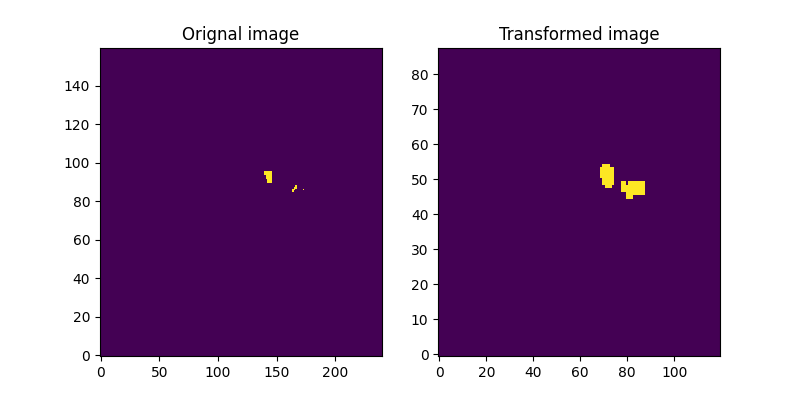

Text(0.5, 1.0, 'Transformed image')

In [317]:
from time import time
from tqdm import tqdm

"""
    Resample a volume that contains discret values
"""
import numpy as np
from soma import aims, aimsalgo
from time import time


def coordinates_array(shape, offset=(0, 0, 0), dtype=int):
    x, y, z = shape
    return np.array([
        np.repeat(np.arange(x), y * z) + offset[0],
        np.tile(np.repeat(np.arange(y), z), x) + offset[1],
        np.tile(np.arange(z), x * y) + offset[2]
    ], dtype=dtype)


# TODO: use new repo or compare
def transform_3d_array(arr, trm):
    arr = np.array(arr)
    if len(arr.shape) != 3:
        raise ValueError("Invalid input array.")

    coords = coordinates_array(arr.shape)
    tcoords = np.dot(trm[:3, :3],
                     coords + np.tile(trm[:3, 3], (coords.shape[1], 1)).T)

    valids = np.prod(tcoords >= 0, axis=0) * np.prod(
        tcoords < np.tile(arr.shape, (tcoords.shape[1], 1)).T, axis=0)
    tcoords = np.array(tcoords.astype(int))
    timg = -np.ones(arr.shape)

    valids = valids.astype(bool)
    timg[coords[0, valids], coords[1, valids], coords[2, valids]] = arr[
        tcoords[0, valids], tcoords[1, valids], tcoords[2, valids]]
    return timg



def maxinpatch_resample_arr(original_dt, trm=None, ratio=0, patch=None):
    """
        Parameters
        ----------
        ori: MRI image file (.nii, .nii.gz, .ima)
            Original image.
        trm: 4x4 matrix (optional)
            Transformation matrix. Default is None which skips the transformation step
        ratio: float or tuple or array of 3 elements (optional)
            Resampling ratio. Default is 0 which skips the resampling step
    """
    if isinstance(ratio, (int, float)):
        ratio = (ratio, ratio, ratio)
    elif isinstance(ratio, (list, tuple, np.ndarray)) and len(ratio) == 3:
        pass
    else:
        raise ValueError("ratio should be either an integer, a float, a list,"
                         "a numpy.ndarray or a tuple of three elments. "
                         "{} given".format(type(ratio)))

    # Sampling patch
    if len(patch.shape) == 1 and patch.shape[0] == 1:
        # patch_coords = np.array([0, 0, 0], dtype=int)
        # TODO: implement this case
        raise NotImplementedError()
    else:
        x, y, z = np.array((np.array(patch.shape) - 1) / 2).astype(int)
        patch_coords = coordinates_array(patch.shape, offset=(-x, -y, -z))

    if trm is not None:
        # Apply the transformation to the original image
        original_dt = transform_3d_array(original_dt, trm)

    if isinstance(ratio, int) and ratio == 0:
        return original_dt

    # Init the resampled image
    new_dim = np.round(np.asarray(original_dt.shape[:3]) / ratio).astype(int)

    # Coordinates in the resampled space
    # output is of shape (3, number of voxel in resampled space)
    tgt_coords = coordinates_array(new_dim)
    n_vx = tgt_coords.shape[1]

    # Then resample

    # Create a patch per voxel
    # (3, number of voxels in the patch, number of voxel in the target)
    patch_coords = np.tile(patch_coords.T, (n_vx, 1, 1)).T
    # Center each patch on the closest voxel of the original space
    # (3, number of voxels in the patch, number of voxel in the target)
    tgt_coords = np.round(tgt_coords * np.tile(ratio, (tgt_coords.shape[1],1)).T).astype(int)
    patch_coords += np.swapaxes(
        np.tile(tgt_coords, (patch_coords.shape[1], 1, 1)), 0, 1)
    # Do not take into account coordinates that are outside the original image
    maxs = np.repeat(original_dt.shape[:3],
                     patch_coords.shape[1] * patch_coords.shape[2]).reshape(
        (patch_coords.shape))
    valid_coords = np.prod((patch_coords >= 0) * (patch_coords < maxs), axis=0)
    valid_coords = valid_coords.flatten().astype(bool)
    # Read values for each valid patch coordinates
    # Output is ()
    flt_coords = patch_coords.reshape(
        (3, patch_coords.shape[1] * patch_coords.shape[2]))
    values = np.zeros((flt_coords.shape[1],))
    print(flt_coords[:, valid_coords == True][:, :16])

    values[valid_coords] = original_dt[
        flt_coords[0, valid_coords], flt_coords[1, valid_coords], flt_coords[
            2, valid_coords]]
    # Get the maximal value in each patch
    values = np.max(
        values.reshape((patch_coords.shape[1], patch_coords.shape[2])), axis=0)

    return values.reshape(new_dim)


def maxinpatch_resample_image(image, output_vs, transfo_file=None, patch_size=3):
    if isinstance(image, str):
        image = aims.read(image)
    transfo = aims.read(transfo_file) if transfo_file else None
    ratio =  output_vs / np.array(image.header()['voxel_size'][:3])
    patch = np.ones((patch_size, patch_size, patch_size))
    # TODO: make resampling of 4d image available
    img = np.array(image)[:, :, :, 0]
    return maxinpatch_resample_arr(img, transfo, ratio, patch)

    
from soma import aims
f = "/neurospin/dico/bcagna/projects/deep_folding/data/source/archi/t1-1mm-1/025/t1mri/default_acquisition/default_analysis/segmentation/Lskeleton_025.nii.gz"
# f = "/neurospin/dico/data/bv_databases/human/pclean/all/beflo/t1mri/t1/default_analysis/segmentation/Lskeleton_beflo.nii.gz" 
vol = aims.read(f)


img = np.array(vol)[:, :, :, 0]

# img = -np.ones((50, 50, 50))
# img[0, :img.shape[1]//2, :] = 1
# img[0, img.shape[1]//2:, :] = 2
# img[0, -1, :] = 3
# img[:, 30, :] = 4

# Transformation
angle = np.deg2rad(0)
tx, ty, tz = 0, 0,  0
trm = np.array(
[
    [np.cos(angle), -np.sin(angle), 0, tx], 
    [np.sin(angle),  np.cos(angle), 0, ty], 
    [0, 0, 1, tz],
    [0, 0, 0, 1]
])

r = 2
tic = time()
# timg = maxinpatch_resample_arr(img, ratio=[r, r, r], trm=trm, patch=np.ones((3,3,3)))
timg = maxinpatch_resample_image(f, (2, 2, 2), transfo_file=None, patch_size=3)
print(time() - tic)
print(timg.shape)

fig = plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img[:, :, 20], interpolation="nearest", aspect='auto', origin="lower")
plt.title("Orignal image")
plt.subplot(122)
plt.imshow(timg[:, :, 20//r], interpolation="nearest", aspect='auto', origin="lower")
plt.title("Transformed image")